# Importing the data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
from tensorflow.keras.datasets import cifar10

## Splitting into Training and Testing sets

In [3]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170500096/170498071 [==============================] - 4s 0us/step


In [4]:
x_train.shape

(50000, 32, 32, 3)

In [5]:
x_train[0].shape

(32, 32, 3)

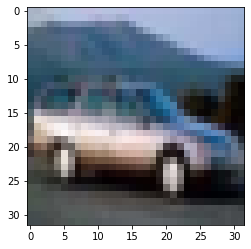

In [14]:
plt.imshow(x_train[4])

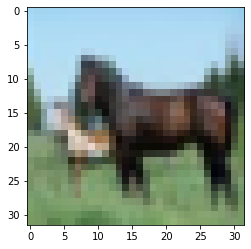

In [15]:
plt.imshow(x_train[12])

## Pre-processing

In [16]:
x_train.max()

255

In [17]:
x_train = x_train/255

In [18]:
x_test = x_test/255

In [19]:
x_test.shape

(10000, 32, 32, 3)

In [20]:
from tensorflow.keras.utils import to_categorical

In [21]:
y_cat_train = to_categorical(y_train, 10)

In [22]:
y_cat_test = to_categorical(y_test, 10)

In [23]:
y_train[0]

array([6], dtype=uint8)

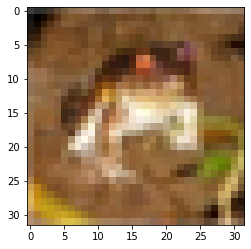

In [24]:
plt.imshow(x_train[0])

## Training the model

In [25]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten

In [26]:
32*32*3

3072

In [27]:
model = Sequential()

#Covolutional Layer
model.add(Conv2D(filters=32, kernel_size=(4,4), input_shape=(32,32,3),
                 activation='relu'))
#Pooling Layer
model.add(MaxPool2D(pool_size=(2,2)))

#Covolutional Layer
model.add(Conv2D(filters=32, kernel_size=(4,4), input_shape=(32,32,3),
                 activation='relu'))
#Pooling Layer
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(256, activation='relu'))

model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam',
              metrics=['accuracy'])

In [28]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 29, 29, 32)        1568      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 32)        16416     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
flatten (Flatten)            (None, 800)               0         
_________________________________________________________________
dense (Dense)                (None, 256)               205056    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                2

In [29]:
from tensorflow.keras.callbacks import EarlyStopping

In [30]:
early_stop = EarlyStopping(monitor='val_loss', patience=2)

In [31]:
model.fit(x_train, y_cat_train, epochs=15,
          validation_data=(x_test, y_cat_test), callbacks=[early_stop])

Epoch 1/15
1563/1563 [==============================] - 60s 38ms/step - loss: 1.4748 - accuracy: 0.4651 - val_loss: 1.3000 - val_accuracy: 0.5412
Epoch 2/15
1563/1563 [==============================] - 61s 39ms/step - loss: 1.1553 - accuracy: 0.5950 - val_loss: 1.1170 - val_accuracy: 0.6021
Epoch 3/15
1563/1563 [==============================] - 60s 38ms/step - loss: 1.0100 - accuracy: 0.6451 - val_loss: 1.0841 - val_accuracy: 0.6237
Epoch 4/15
1563/1563 [==============================] - 60s 38ms/step - loss: 0.9047 - accuracy: 0.6827 - val_loss: 0.9957 - val_accuracy: 0.6482
Epoch 5/15
1563/1563 [==============================] - 59s 38ms/step - loss: 0.8123 - accuracy: 0.7155 - val_loss: 1.0198 - val_accuracy: 0.6518
Epoch 6/15
1563/1563 [==============================] - 59s 38ms/step - loss: 0.7329 - accuracy: 0.7434 - val_loss: 0.9607 - val_accuracy: 0.6744
Epoch 7/15
1563/1563 [==============================] - 60s 38ms/step - loss: 0.6582 - accuracy: 0.7689 - val_loss: 1.0346 -

## Evaluation and Prediction

In [32]:
metrics = pd.DataFrame(model.history.history)

In [33]:
metrics

,loss,accuracy,val_loss,val_accuracy
0,1.474763,0.46506,1.299951,0.5412
1,1.155292,0.59496,1.117043,0.6021
2,1.010008,0.64506,1.084148,0.6237
3,0.904654,0.68270,0.995660,0.6482
4,0.812336,0.71550,1.019817,0.6518
5,0.732901,0.74342,0.960735,0.6744
6,0.658190,0.76892,1.034592,0.6705
7,0.594915,0.79146,0.996547,0.6811


In [34]:
metrics.columns

Index(['loss', 'accuracy', 'val_loss', 'val_accuracy'], dtype='object')

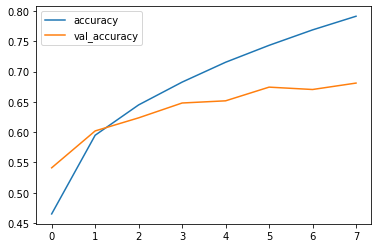

In [35]:
metrics[['accuracy', 'val_accuracy']].plot()

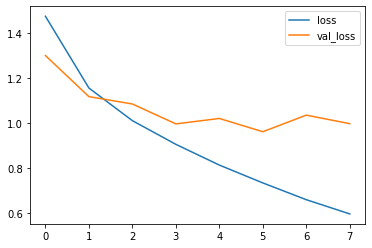

In [36]:
metrics[['loss', 'val_loss']].plot()

In [37]:
model.evaluate(x_test, y_cat_test, verbose=0)

[0.9965470433235168, 0.6811000108718872]

In [38]:
from sklearn.metrics import classification_report, confusion_matrix

In [39]:
predictions = model.predict_classes(x_test)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


In [42]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.72      0.73      0.72      1000
           1       0.72      0.87      0.79      1000
           2       0.63      0.55      0.59      1000
           3       0.51      0.44      0.47      1000
           4       0.67      0.60      0.64      1000
           5       0.53      0.66      0.59      1000
           6       0.74      0.79      0.76      1000
           7       0.75      0.72      0.73      1000
           8       0.78      0.76      0.77      1000
           9       0.79      0.70      0.74      1000

    accuracy                           0.68     10000
   macro avg       0.68      0.68      0.68     10000
weighted avg       0.68      0.68      0.68     10000



In [43]:
import seaborn as sns

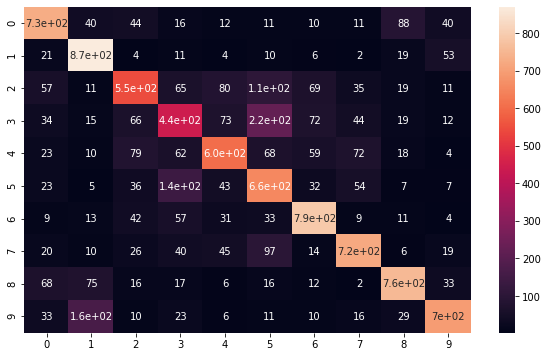

In [44]:
plt.figure(figsize=(10,6))
sns.heatmap(confusion_matrix(y_test, predictions), annot=True)

### Prediction on a Single Image

In [45]:
my_img = x_test[16]

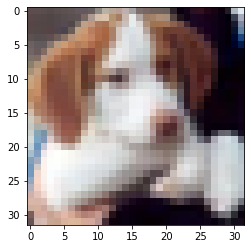

In [46]:
plt.imshow(my_img)

In [47]:
y_test[16]

array([5], dtype=uint8)

In [48]:
model.predict_classes(my_img.reshape(1,32,32,3))

array([5])